In [ ]:
# !pip install pybbn 

In [1]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

In [8]:
 # create the nodes
burglary = BbnNode(Variable(0, 'burglary', ['true', 'false']), [0.001, 0.999])
earthquake = BbnNode(Variable(1, 'earthquake', ['true', 'false']), [0.002, 0.998])
alarm = BbnNode(Variable(2, 'alarm', ['true', 'false']), [0.95, 0.05, 0.94, 0.06,0.29,0.71,0.001, 0.999])
john_calls = BbnNode(Variable(3, 'john_calls', ['true', 'false']), [0.9, 0.1, 0.05, 0.95, 0.3, 0.7, 0.1, 0.9])
mary_calls = BbnNode(Variable(4, 'mary_calls', ['true', 'false']), [0.7, 0.3, 0.01, 0.99])

bbn = Bbn() \
    .add_node(burglary) \
    .add_node(earthquake) \
    .add_node(alarm) \
    .add_node(rain) \
    .add_node(john_calls) \
    .add_node(mary_calls) \
    .add_edge(Edge(burglary, alarm, EdgeType.DIRECTED)) \
    .add_edge(Edge(earthquake, alarm, EdgeType.DIRECTED)) \
    .add_edge(Edge(alarm, john_calls, EdgeType.DIRECTED)) \
    .add_edge(Edge(alarm, mary_calls, EdgeType.DIRECTED)) 

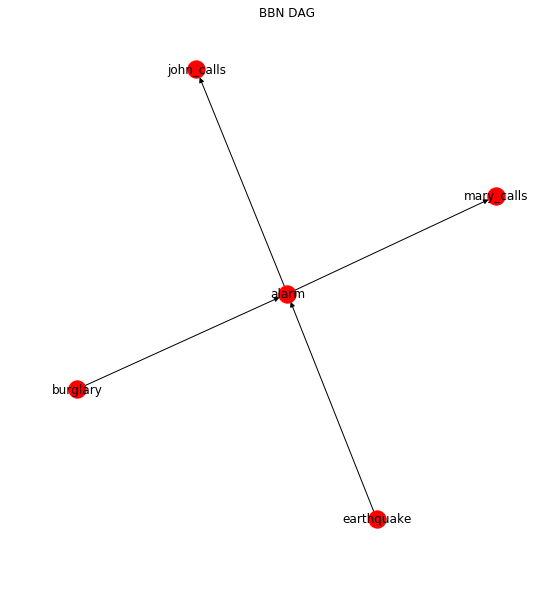

In [9]:
 %matplotlib inline
from pybbn.generator.bbngenerator import convert_for_drawing
import matplotlib.pyplot as plt
import networkx as nx
import warnings

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    graph = convert_for_drawing(bbn)
    pos = nx.nx_agraph.graphviz_layout(graph, prog='neato')

    plt.figure(figsize=(20, 10))
    plt.subplot(121) 
    labels = dict([(k, node.variable.name) for k, node in bbn.nodes.items()])
    nx.draw(graph, pos=pos, with_labels=True, labels=labels)
    plt.title('BBN DAG')

In [11]:
# convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)
# insert an observation evidence
ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('mary_calls')) \
    .with_evidence('true', 1.0) \
    .build()
join_tree.set_observation(ev)
# print the marginal probabilities
for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('--------------------->')

2|alarm|true,false
2=true|0.15009
2=false|0.84991
--------------------->
3|john_calls|true,false
3=true|0.17758
3=false|0.82242
--------------------->
4|mary_calls|true,false
4=true|1.00000
4=false|0.00000
--------------------->
1|earthquake|true,false
1=true|0.03588
1=false|0.96412
--------------------->
0|burglary|true,false
0=true|0.05612
0=false|0.94388
--------------------->


In [13]:
join_tree = InferenceController.apply(bbn)
ev1 = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('burglary')) \
    .with_evidence('true', 1.0) \
    .build()
ev2 = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('john_calls')) \
    .with_evidence('false', 1.0) \
    .build()

ev3 = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('mary_calls')) \
    .with_evidence('false', 1.0) \
    .build()


join_tree.set_observation(ev1)
join_tree.set_observation(ev2)
join_tree.set_observation(ev3)

for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)
    print('--------------------->')

2|alarm|true,false
2=true|0.33329
2=false|0.66671
--------------------->
3|john_calls|true,false
3=true|0.00000
3=false|1.00000
--------------------->
4|mary_calls|true,false
4=true|0.00000
4=false|1.00000
--------------------->
1|earthquake|true,false
1=true|0.00179
1=false|0.99821
--------------------->
0|burglary|true,false
0=true|1.00000
0=false|0.00000
--------------------->
